IMPORTING NECESSARY PACKAGES AND MODULES

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier

READING THE CSV FILE

In [37]:
df = pd.read_csv("winequality.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False


CHECKING NUMBER OF (ROWS,COLUMNS) TO KNOW HOW LARGE IS DATA

In [32]:
df.shape

(4898, 13)

# Data preprocessing and exploration

CHECKING FOR NULL AND MISSING VALUES FOR DATA PREPPROCESSING(NO NULL VALUES)

In [33]:
df.info()
df.isnull().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
recommend               4898 non-null bool
dtypes: bool(1), float64(11), int64(1)
memory usage: 464.1 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
recommend               0
dtype: int64

FREQUENCY OF EACH QUALITY LEVEL TO CHECK WHICH PREDOMINATES

In [34]:
data1 = df.quality.value_counts().sort_index()
data1_df = pd.DataFrame({'Quality Level': data1.index,'Frequency': data1.values})
data1_df

,Quality Level,Frequency
0,3,20
1,4,163
2,5,1457
3,6,2198
4,7,880
5,8,175
6,9,5


BAR CHART SHOWING QUALITY LEVEL DISTRIBUTION

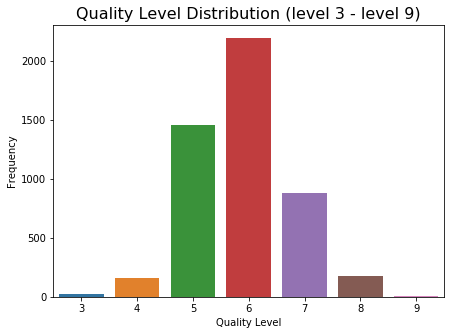

In [35]:
plt.figure(figsize=(7,5))
sns.barplot(x = 'Quality Level', y ="Frequency", data = data1_df)
plt.title('Quality Level Distribution (level 3 - level 9)',fontsize=16)
plt.show()

# data exploration and preprocessing for binary classification

FREQUENCY OF EACH QUALITY LABEL (recommend-target variable for binary classification)

In [36]:
data2 = df.recommend.value_counts().sort_index()
data2_df = pd.DataFrame({'Quality Label': data2.index,'Frequency': data2.values})
data2_df

,Quality Label,Frequency
0,False,3838
1,True,1060


In [ ]:
BAR CHART SHOWING QUALITY LABEL DISTRIBUTION

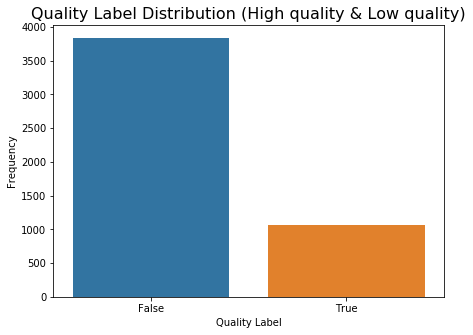

In [37]:
plt.figure(figsize=(7,5))
sns.barplot(x = 'Quality Label', y ="Frequency", data = data2_df)
plt.title('Quality Label Distribution (High quality & Low quality)',fontsize=16)
plt.show()

PREPROCESSING RECOOMEND ATTRIBUTE (TRUE-1,FALSE-0) CHANGING TO NUMERICAL FROM CATEGORICAL 

In [ ]:
df = df*1
df

# modelling for binary classification

features-LIST WITH DEPENDENT VARIABLES 
target1-target variable for binary classification
target2-target variable for multi-class classification

In [43]:
features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH','sulphates','alcohol']
target1 = ['recommend']
target2 = ['level']

decision tree classification using gini index criteria for feature importance selection

In [44]:
x = df[features]
y1 = df[target1].values.ravel()
X_train, X_test, y_train, y_test = train_test_split( x, y1, test_size = 0.20, random_state=42)
clf_gini = DecisionTreeClassifier(criterion = "gini",  splitter="random",random_state = 42,max_depth=5, min_samples_leaf=2)
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)
y_prob = clf_gini.predict_proba(X_test)[:,1]
print ("Accuracy of decision tree using gini index (binary classification) is ", accuracy_score(y_test,y_pred)*100)
print (classification_report(y_test,y_pred))

Accuracy of decision tree using gini index (binary classification) is  77.24489795918367
              precision    recall  f1-score   support

       False       0.79      0.96      0.87       753
        True       0.53      0.15      0.23       227

    accuracy                           0.77       980
   macro avg       0.66      0.55      0.55       980
weighted avg       0.73      0.77      0.72       980



decision tree classification using entropy criteria for feature importance selection

In [45]:

X_train, X_test, y_train, y_test = train_test_split( x, y1, test_size = 0.20, random_state=42)
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 42,max_depth=5, min_samples_leaf=2)
clf_entropy.fit(X_train, y_train)
y_pred_en = clf_entropy.predict(X_test)
y_prob_en = clf_entropy.predict_proba(X_test)[:,1]
print( "Accuracy of decision tree using entropy(binary classification) is ", accuracy_score(y_test,y_pred_en)*100)
print (classification_report(y_test,y_pred_en))

Accuracy of decision tree using entropy(binary classification) is  79.89795918367348
              precision    recall  f1-score   support

       False       0.87      0.87      0.87       753
        True       0.57      0.56      0.57       227

    accuracy                           0.80       980
   macro avg       0.72      0.72      0.72       980
weighted avg       0.80      0.80      0.80       980



# data exploration and preprocessing for multi-class classification

ADDING NEW COLUMN LEVEL(quality <=4 - level 3,quality between (4,6] - level 2 , otherwise level 1) FOR MULTI-CLASS CLASSIFICATION

In [46]:
df_multi = df 
df_multi['level'] = df_multi.quality.apply(lambda q: 3 if q <= 4 else 2 if (q > 4 and q<= 6) else 1)
df_multi.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend,level
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False,2


FREQUENCY OF EACH QUALITY LEVEL(level - target variable )

In [47]:
data3 = df_multi.level.value_counts().sort_index()
data3_df = pd.DataFrame({'Quality Level': data3.index,'Frequency': data3.values})
data3_df

,Quality Level,Frequency
0,1,1060
1,2,3655
2,3,183


BAR CHART SHOWING QUALITY LEVEL DISTRIBUTION

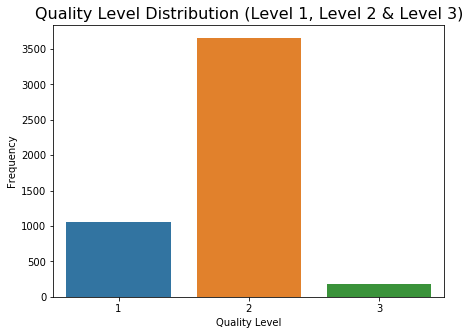

In [50]:
plt.figure(figsize=(7,5))
sns.barplot(x = 'Quality Level', y ="Frequency", data = data3_df)
plt.title('Quality Level Distribution (Level 1, Level 2 & Level 3)',fontsize=16)
plt.show()

# modelling for multi-class classification

decision tree classification using gini index criteria for feature importance selection

In [51]:
y2=df[target2].values.ravel()
X_train, X_test, y_train, y_test = train_test_split( x, y2, test_size = 0.20, random_state=42)
clf_gini = DecisionTreeClassifier(criterion = "gini",  splitter="random",random_state = 42,max_depth=5, min_samples_leaf=2)
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)
y_prob = clf_gini.predict_proba(X_test)[:,1]
print ("Accuracy of decision tree using gini index(multi classification) is ", accuracy_score(y_test,y_pred)*100)
print (classification_report(y_test,y_pred))

Accuracy of decision tree using gini index(multi classification) is  74.6938775510204
              precision    recall  f1-score   support

           1       0.62      0.11      0.18       227
           2       0.75      0.98      0.85       723
           3       0.00      0.00      0.00        30

    accuracy                           0.75       980
   macro avg       0.46      0.36      0.34       980
weighted avg       0.70      0.75      0.67       980



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


decision tree classification using entropy criteria for feature importance selection

In [52]:
X_train, X_test, y_train, y_test = train_test_split( x, y2, test_size = 0.20, random_state=42)
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 42,max_depth=5, min_samples_leaf=2)
clf_entropy.fit(X_train, y_train)
y_pred_en = clf_entropy.predict(X_test)
y_prob_en = clf_entropy.predict_proba(X_test)[:,1]
print( "Accuracy of decision tree using entropy(multi classification) is ", accuracy_score(y_test,y_pred_en)*100)
print (classification_report(y_test,y_pred_en))

Accuracy of decision tree using entropy(multi classification) is  76.0204081632653
              precision    recall  f1-score   support

           1       0.55      0.48      0.51       227
           2       0.82      0.88      0.85       723
           3       0.33      0.10      0.15        30

    accuracy                           0.76       980
   macro avg       0.57      0.49      0.50       980
weighted avg       0.74      0.76      0.75       980

